### Naive Bayes Gaussian and Bernoulli and Analysis MINST

Modified from: Naive Bayes on MNIST dataset – https://github.com/bikz05/ipython-notebooks/blob/master/machine-learning/naive-bayes-mnist-sklearn.ipynb

With some of the analysis form: A Tidy Analysis of the MNIST Dataset in R - https://dzone.com/articles/exploring-handwritten-digit-classification-a-tidy 

In [1]:
%pylab inline
# Fetch the MNIST handwritten digit dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=".")

Populating the interactive namespace from numpy and matplotlib


In [2]:
print mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'COL_NAMES': ['label', 'data'], 'DESCR': 'mldata.org dataset: mnist-original', 'target': array([0., 0., 0., ..., 9., 9., 9.])}


(Number of samples, No. of pixels) =  (70000L, 784L)


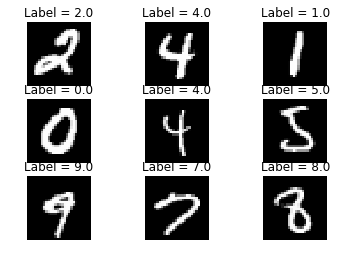

In [3]:
# Display the number of samples 
print "(Number of samples, No. of pixels) = ", mnist.data.shape

# Display 9 number randomly selectly
for c in range(1, 10):
    subplot(3, 3,c)
    i = randint(mnist.data.shape[0])
    im = mnist.data[i].reshape((28,28))
    axis("off")
    title("Label = {}".format(mnist.target[i]))
    imshow(im, cmap='gray')

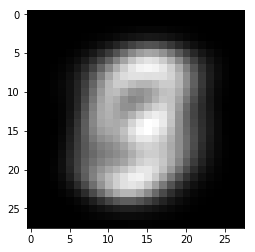

In [4]:
# Average image
import numpy as np
import matplotlib.pylab as plt
i = 0
avg = np.zeros((28, 28))
for data in mnist.data:
    im = data.reshape((28, 28))
    avg += im
    i += 1
avg /= i

plt.figure()
plt.imshow(avg,cmap='gray')
plt.show()

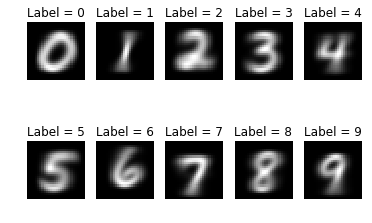

In [5]:
# Average image fo ecach digit class
for c in range(0, 10):
    subplot(2, 5,c+1)
    avg = np.zeros((28, 28))
    i = 0
    for i, data in enumerate(mnist.data):
        im = data.reshape((28, 28))
        if mnist['target'][i] == c:
            avg += im
            i += 1
    avg /= i
    axis("off")
    title("Label = "+str(c))
    imshow(avg,cmap='gray')

In [6]:
# Split the data into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.05, random_state=42)

# Which is same as 
# x_train = mnist.data[:split]
# y_train = mnist.target[:split]
# x_test = mnist.data[split:]
# y_test = mnist.target[split:]

In [7]:
# Create the Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [8]:
# Perform the predictions
clf.fit(x_train,y_train)
# Perform the predictions
y_predicted = clf.predict(x_test)
# Calculate the accuracy of the prediction
from sklearn.metrics import accuracy_score
print "Accuracy = {} %".format(accuracy_score(y_test, y_predicted)*100)
# Cross validate the scores
from sklearn.metrics import classification_report
print "Classification Report \n {}".format(classification_report(y_test, y_predicted, labels=range(0,10)))

Accuracy = 81.7142857143 %
Classification Report 
              precision    recall  f1-score   support

          0       0.91      0.89      0.90       320
          1       0.85      0.95      0.90       387
          2       0.89      0.84      0.87       352
          3       0.78      0.81      0.80       356
          4       0.83      0.73      0.78       329
          5       0.85      0.67      0.75       342
          6       0.90      0.91      0.91       377
          7       0.94      0.82      0.87       360
          8       0.63      0.72      0.67       337
          9       0.66      0.80      0.72       340

avg / total       0.83      0.82      0.82      3500



In [9]:
# Create the Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

In [10]:
# Perform the predictions
clf.fit(x_train,y_train)
# Perform the predictions
y_predicted = clf.predict(x_test)
# Calculate the accuracy of the prediction
from sklearn.metrics import accuracy_score
print "Accuracy = {} %".format(accuracy_score(y_test, y_predicted)*100)
# Cross validate the scores
from sklearn.metrics import classification_report
print "Classification Report \n {}".format(classification_report(y_test, y_predicted, labels=range(0,10)))

Accuracy = 82.3142857143 %
Classification Report 
              precision    recall  f1-score   support

          0       0.88      0.87      0.87       320
          1       0.85      0.96      0.90       387
          2       0.88      0.82      0.85       352
          3       0.74      0.82      0.78       356
          4       0.80      0.80      0.80       329
          5       0.82      0.70      0.75       342
          6       0.91      0.89      0.90       377
          7       0.93      0.83      0.88       360
          8       0.75      0.74      0.74       337
          9       0.70      0.79      0.74       340

avg / total       0.83      0.82      0.82      3500

